In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt

## 1) 데이터셋 로드

In [ ]:
# 데이터셋 로드
(train_dataset, test_dataset), info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    with_info=True,
    as_supervised=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.1.incomplete7QSTSJ/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [ ]:
def preprocess_image(image, label):
    image = tf.image.resize(image, (150, 150))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label


In [ ]:
BATCH_SIZE = 32
train_dataset = train_dataset.map(preprocess_image).shuffle(1000).batch(BATCH_SIZE)
test_dataset = test_dataset.map(preprocess_image).batch(BATCH_SIZE)

In [ ]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, ResNet101V2
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam

# ResNet50 모델 불러오기 (include_top=False로 맨 위 레이어 제외)
base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

In [ ]:
base_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 156, 156, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 75, 75, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 77, 77, 64)           0         ['conv1_conv[0][0]']          
                                                                                         

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

model = Sequential(base_model)

# 추가적인 레이어 추가
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))  # 추가적인 Dense 레이어 1
model.add(Dense(64, activation='relu'))   # 추가적인 Dense 레이어 2
model.add(Dense(1, activation='sigmoid'))  # 예시로 이진 분류를 위한 출력

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 5, 5, 2048)        23564800  
                                                                 
 flatten_3 (Flatten)         (None, 51200)             0         
                                                                 
 dense_12 (Dense)            (None, 256)               13107456  
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 1)                 65        
                                                                 
Total params: 36713473 (140.05 MB)
Trainable params: 1

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_dataset, epochs=5, validation_data=test_dataset)

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Epoch 1/10
582/582 [==============================] - 61s 84ms/step - loss: 0.1876 - accuracy: 0.9481 - val_loss: 0.1082 - val_accuracy: 0.9579
Epoch 2/10
582/582 [==============================] - 46s 77ms/step - loss: 0.0616 - accuracy: 0.9772 - val_loss: 0.1365 - val_accuracy: 0.9607
Epoch 3/10
582/582 [==============================] - 48s 80ms/step - loss: 0.0319 - accuracy: 0.9879 - val_loss: 0.1912 - val_accuracy: 0.9611
Epoch 4/10
582/582 [==============================] - 49s 82ms/step - loss: 0.0483 - accuracy: 0.9859 - val_loss: 0.1639 - val_accuracy: 0.9628
Epoch 5/10
582/582 [==============================] - 48s 80ms/step - loss: 0.0267 - accuracy: 0.9915 - val_loss: 0.2114 - val_accuracy: 0.9632
Epoch 6/10
582/582 [==============================] - 48s 80ms/step - loss: 0.0145 - accuracy: 0.9950 - val_loss: 0.1955 - val_accuracy: 0.9609


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-9-6f565721f3a4>", line 3, in <cell line: 3>
    history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1795, in fit
    self.reset_metrics()
  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2703, in reset_metrics
    def reset_metrics(self):
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_

TypeError: ignored

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

model = Sequential(base_model)

# 추가적인 레이어 추가
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))  # Dropout 추가
model.add(Dense(128, activation='relu'))  # 추가적인 Dense 레이어 1
model.add(Dropout(0.2))  # Dropout 추가
model.add(Dense(64, activation='relu'))   # 추가적인 Dense 레이어 2
model.add(Dense(1, activation='sigmoid'))  # 예시로 이진 분류를 위한 출력

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 5, 5, 2048)        23564800  
                                                                 
 flatten_5 (Flatten)         (None, 51200)             0         
                                                                 
 dense_20 (Dense)            (None, 256)               13107456  
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_21 (Dense)            (None, 128)               32896     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_22 (Dense)            (None, 64)               

Epoch 1/5
582/582 [==============================] - 51s 78ms/step - loss: 0.3381 - accuracy: 0.9341 - val_loss: 0.1249 - val_accuracy: 0.9467
Epoch 2/5
582/582 [==============================] - 46s 76ms/step - loss: 0.1118 - accuracy: 0.9630 - val_loss: 0.1381 - val_accuracy: 0.9486
Epoch 3/5
582/582 [==============================] - 48s 81ms/step - loss: 0.0806 - accuracy: 0.9728 - val_loss: 0.0922 - val_accuracy: 0.9645
Epoch 4/5
582/582 [==============================] - 48s 81ms/step - loss: 0.0591 - accuracy: 0.9798 - val_loss: 0.0999 - val_accuracy: 0.9667
Epoch 5/5
582/582 [==============================] - 47s 80ms/step - loss: 0.0434 - accuracy: 0.9854 - val_loss: 0.1089 - val_accuracy: 0.9652


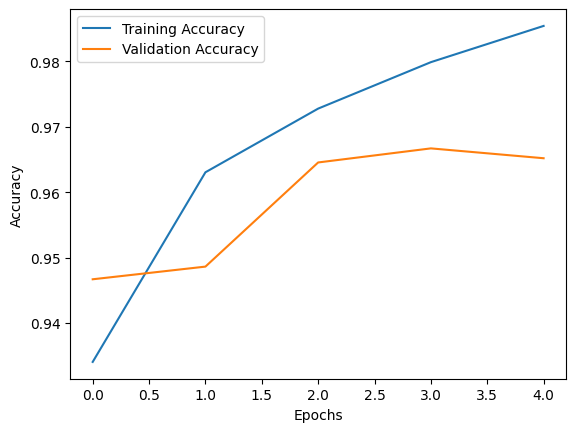

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_dataset, epochs=5, validation_data=test_dataset)

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam

# VGG16 모델 불러오기 (include_top=False로 맨 위 레이어 제외)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.build((224, 224, 3))

# 모델 요약
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_6 (Flatten)         (None, 25088)             0         
                                                                 
 dense_16 (Dense)            (None, 256)               6422784   
                                                                 
 dense_17 (Dense)            (None, 128)               32896     
                                                                 
 dense_18 (Dense)            (None, 64)                8256      
                                                                 
 dense_19 (Dense)            (None, 1)                 65        
                                                                 
Total params: 21178689 (80.79 MB)
Trainable params: 64